**Sriram R - 2020115092 - CEG, Anna University**


**1. Importing Dataset and Libraries**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

ds = pd.read_csv("/content/House Price India.csv")
ds.head(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [54]:
ds.shape

(14620, 23)

In [55]:
ds.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [56]:
print('Null values present:',ds.isnull().any().any())

Null values present: False


In [57]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

**2. Preprocessing the Dataset (Feature Selection)**

In [58]:
ds = ds.drop(['id','Date','Postal Code','living_area_renov','lot_area_renov','Number of schools nearby','Distance from the airport','Renovation Year'],axis='columns')
ds.head(5)

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Lattitude,Longitude,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,52.8645,-114.557,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,52.8878,-114.470,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,52.8852,-114.468,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,52.9532,-114.321,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,52.9047,-114.485,805000


In [59]:
ds.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Lattitude', 'Longitude', 'Price'],
      dtype='object')

In [60]:
print("New shape of dataset: "+str(ds.shape))

New shape of dataset: (14620, 15)


In [61]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [62]:
x = ds.drop('Price',axis='columns')
y = ds['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print('Training data:',len(x_train))
print('Testing data:',len(x_test))

Training data: 11696
Testing data: 2924


In [63]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**3.Building the ANN model**

In [64]:
model = Sequential()

model.add(Input(shape=(14,)))

model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')


In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 20)                300       
                                                                 
 dense_28 (Dense)            (None, 30)                630       
                                                                 
 dense_29 (Dense)            (None, 30)                930       
                                                                 
 dense_30 (Dense)            (None, 20)                620       
                                                                 
 dense_31 (Dense)            (None, 20)                420       
                                                                 
 dense_32 (Dense)            (None, 30)                630       
                                                                 
 dense_33 (Dense)            (None, 30)               

In [66]:
history=model.fit(x=x_train,y=y_train.values,validation_data=(x_test,y_test.values),batch_size=128,epochs=100)

Epoch 1/100
92/92 [==============================] - 3s 6ms/step - loss: 425227059200.0000 - val_loss: 424708407296.0000
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 285160210432.0000 - val_loss: 104129503232.0000
Epoch 3/100
92/92 [==============================] - 0s 5ms/step - loss: 93734313984.0000 - val_loss: 95924879360.0000
Epoch 4/100
92/92 [==============================] - 0s 5ms/step - loss: 85542543360.0000 - val_loss: 88289574912.0000
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 77207511040.0000 - val_loss: 78541791232.0000
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 67868520448.0000 - val_loss: 68196564992.0000
Epoch 7/100
92/92 [==============================] - 0s 5ms/step - loss: 59352440832.0000 - val_loss: 60231741440.0000
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 53012533248.0000 - val_loss: 55183458304.0000
Epoch 9/100
92/92 [=========================

**4.Evaluating the model**

In [67]:
y_predicted = model.predict(x_test)
print('R2 score:',r2_score(y_test,y_predicted))

92/92 [==============================] - 0s 2ms/step
R2 score: 0.7909839152840406


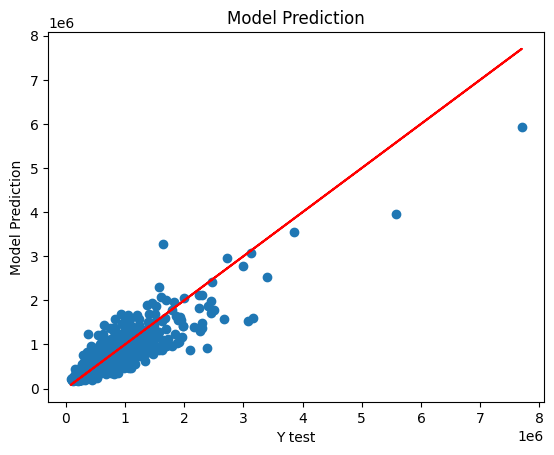

In [68]:
y_test_values = y_test.values
y_predicted_values = y_predicted.reshape(len(y_predicted))

plt.scatter(y_test_values,y_predicted_values)
plt.plot(y_test_values,y_test_values,'r')
plt.title('Model Prediction')
plt.xlabel('Y test')
plt.ylabel('Model Prediction')
plt.show()

In [70]:
pred=model.predict(x_test[1:2])
print("Predicted Price: ",pred[0][0])
print("Actual Price: ",y_test_values[1])

1/1 [==============================] - 0s 27ms/step
Predicted Price:  1162731.6
Actual Price:  1160000
